In [1]:
import matplotlib.pyplot as plt

from derive_conceptualspace.pipeline import SnakeContext, load_envfiles
from misc_util.logutils import setup_logging
from misc_util.pretty_print import display
from derive_conceptualspace.util.result_analysis_tools import getfiles_allconfigs
from derive_conceptualspace.util.desc_object import DescriptionList
from derive_conceptualspace.pipeline import cluster_loader

plt.rcParams['figure.figsize'] = [16, 10]

<span style="font-size:11pt"></span>

2022-04-14 08:28:50.445374: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/chris/Documents/JOBS/Uhrig-Gesture-Recog/skelshop_deps/openpose_cpu/build/src/openpose/
2022-04-14 08:28:50.445429: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
setup_logging()
load_envfiles("siddata")
configs, print_cnf = getfiles_allconfigs("filtered_dcm", verbose=True)

derive_conceptualspace/util/result_analysis_tools.py:33: UserWarning: There are files that won't be considered here: 
    siddata2022/de_debug_True/mfauhcsd2_onlyorig_minwords80/filtered_dcm_tfidf_ppmi.json
    siddata2022/de_debug_True/mfauhcsd2_onlyorig_minwords80/filtered_dcm_tfidf_count.json
    siddata2022/de_debug_True/mfauhcsd2_onlyorig_minwords80/filtered_dcm_tfidf_tfidf.json
    siddata2022/de_debug_True/mfauhtcsldp_onlyorig_minwords80/filtered_dcm_tfidf_ppmi.json
    siddata2022/de_debug_True/mfauhtcsldp_onlyorig_minwords80/filtered_dcm_tfidf_count.json
    siddata2022/de_debug_True/mfauhtcsldp_onlyorig_minwords80/filtered_dcm_tfidf_tfidf.json


<span style="font-size:11pt">There are 9 different parameter-combis for dataset <span style="color: #0000ff">siddata2022</span>:</span>

{'dataset': 'siddata2022',
 'language': 'de',
 'debug': 'False',
 'pp_components': ['mfauhcsd2', 'mfauhtcsldp', 'mfhcsd2'],
 'translate_policy': 'onlyorig',
 'min_words_per_desc': '80',
 'extraction_method': 'tfidf',
 'dcm_quant_measure': ['count', 'ppmi', 'tfidf']}

In [3]:
# def filter_conf(conflist, restrictions=None):
#     restrictions = restrictions or (lambda x: True)
#     return [elem for elem in conflist if restrictions(elem)]

# ctx2 = SnakeContext.loader_context(config=filter_conf(configs, restrictions=lambda x: x["embed_dimensions"] == 50)[0])

In [4]:
ctx = SnakeContext.loader_context(config=configs[0], silent=False)

<span style="font-size:11pt">Config-File /home/chris/Documents/UNI_neu/Masterarbeit/Derive_Conceptualspace/config/derrac2015_edited.yml loaded.</span>

<span style="font-size:11pt">Running with the following settings [<span style="color: #ff0000">b0ad633ec3</span>]: CLASSIFIER: <span style="color: #0000ff">SVM</span>, CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_rank2rank_onlypos_min</span>, DATASET: <span style="color: #ff0000">siddata2022</span>, DCM_QUANT_MEASURE: <span style="color: #0000ff">count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: <span style="color: #0000ff">mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">50</span>, EXTRACTION_METHOD: <span style="color: #ff0000">tfidf</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: <span style="color: #0000ff">de</span>, MIN_WORDS_PER_DESC: <span style="color: #ff0000">80</span>, PP_COMPONENTS: <span style="color: #ff0000">mfauhcsd2</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: <span style="color: #ff0000">None</span>, SEC_LAMBDA: <span style="color: #0000ff">0.1</span>, TRANSLATE_POLICY: <span style="color: #0000ff">onlyorig</span></span>

In [5]:
descriptions, filtered_dcm = ctx.load("pp_descriptions", "filtered_dcm", # "embedding", "clusters"
                        loaders=dict(pp_descriptions=DescriptionList.from_json, clusters=cluster_loader, embedding=lambda **args: args["embedding"].embedding_))

In [6]:
display(ctx.display_output("pp_descriptions"))

<span style="font-size:11pt">Running with the following settings [<span style="color: #ffff00">abd568686c</span>]: CLASSIFIER: <span style="color: #0000ff">SVM</span>, CLASSIFIER_SUCCMETRIC: <span style="color: #ff0000">kappa_digitized_onlypos_2</span>, DATASET: </span>siddata2022</span>, DCM_QUANT_MEASURE: </span>count</span>, DEBUG: <span style="color: #0000ff">False</span>, EMBED_ALGO: </span>mds</span>, EMBED_DIMENSIONS: <span style="color: #ff0000">3</span>, EXTRACTION_METHOD: </span>tfidf</span>, KAPPA_WEIGHTS: <span style="color: #0000ff">quadratic</span>, LANGUAGE: </span>de</span>, MIN_WORDS_PER_DESC: <span style="color: #ff0000">80</span>, PP_COMPONENTS: </span>mfauhcsd2</span>, PRIM_LAMBDA: <span style="color: #0000ff">0.5</span>, QUANTIFICATION_MEASURE: <span style="color: #ff0000">ppmi</span>, RANDOM_SEED: </span>None</span>, SEC_LAMBDA: <span style="color: #ff0000">0.2</span>, TRANSLATE_POLICY: </span>onlyorig</span><br>The following Pre-Processings will be performed: sentwise_merge, add_additionals, add_title, add_subtitle, remove_htmltags, convert_lower, remove_stopwords, remove_diacritics, use_skcountvec<br>Dropped 4495 out of 30841 descriptions because I will take only the ones of language de (26346 left)<br>pre-preprocessing descriptions: 100%|██████████| 30841/30841 [01:32<00:00, 334.19it/s]<br>Removed 14745 of 26346 Descriptions because they are less than 80 words (11601 left)<br>Saving figure `Words_per_Description_2022-03-17_23-40-37` under `/home/chris/Documents/UNI_neu/Masterarbeit/data_new/saved_plots/2022-03-17/Words_per_Description_2022-03-17_23-40-37.png`</span></span></span>

In [7]:
# filtered_dcm.show_info(descriptions=descriptions)

In [8]:
from misc_util.pretty_print import pretty_print as print
from derive_conceptualspace.util.mpl_tools import show_hist
import numpy as np
from tqdm import tqdm
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
self = filtered_dcm
occurs_in = [set(j[0] for j in i) if i else set() for i in self.dtm]
num_occurences = [sum([term_ind in i for i in occurs_in]) for term_ind in tqdm(range(len(self.all_terms)), desc="Counting Occurences [verbose]")]

Counting Occurences [verbose]: 100%|██████████| 10060/10060 [00:23<00:00, 423.71it/s]


In [9]:
counts = pd.Series(np.array(num_occurences))
aggs = counts.agg((min, np.mean, np.median, min), axis="rows")
aggs = pd.concat((aggs, counts.quantile([.05, .95])))
aggs.astype(int)

min        25
mean      109
median     49
min        25
0.05       26
0.95      375
dtype: int64

In [10]:
%%capture
fig, ax = show_hist(num_occurences, f"Docs per Candidate ({self.n_docs} docs, {len(self.all_terms)} terms)", xlabel="#Texts containing a Candidate", 
                    ylabel="Candidate-count (log scale)", cutoff_percentile=97, no_plot=False, log=True,
                    fig_kwargs=dict(figsize=(16, 6)))

<span style="font-size:11pt">Docs per Candidate (11601 docs, 10060 terms)</span>

/tmp/ipykernel_2346358/1892450145.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator


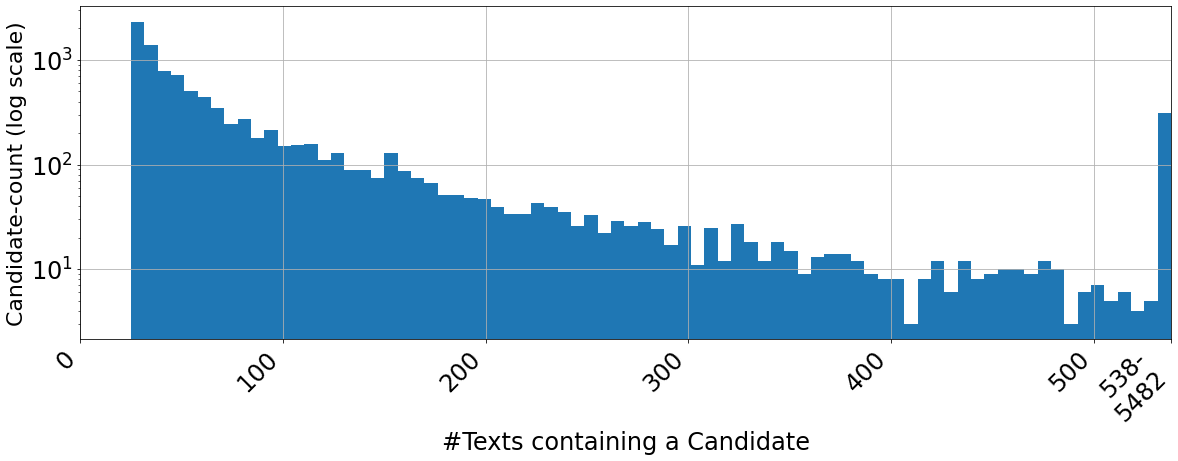

In [11]:
print(f"Docs per Candidate ({self.n_docs} docs, {len(self.all_terms)} terms)")
ax.get_xticklabels()[-1].set_text(ax.get_xticklabels()[-1].get_text().replace("-","-\n"))
ax.set_ylabel(ax.get_ylabel(), fontsize=22)
ax.set_xlabel(ax.get_xlabel(), fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=24)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=24)
ax.grid()
ax.set_title("")
with PdfPages("/home/chris/Documents/UNI_neu/Masterarbeit/MastersThesisText/graphics/dataset_new/docs_per_phrase.pdf") as pdf:
    plt.show()
    pdf.savefig(fig, bbox_inches='tight')
    
fig

In [12]:
for thresh in [25, 50, 100]:
    above_threshold = len([i for i in num_occurences if i>= thresh])
    sorted_canditerms = sorted([[ind, elem] for ind, elem in enumerate(num_occurences)], key=lambda x:x[1], reverse=True)
    print(f"Found {len(self.all_terms)} candidate Terms, {above_threshold} ({round(above_threshold/len(self.all_terms)*100)}%) of which occur in at least {thresh} descriptions.")
    print("The 25 terms that occur in the most descriptions (incl the #descriptions they occur in):",
          ", ".join([f"{self.all_terms[ind]} ({occs})" for ind, occs in sorted_canditerms[:25]]))
    max_ind = np.unravel_index(self.as_csr().argmax(), self.as_csr().shape)
    print(f"Max value: Term *b*{self.all_terms[max_ind[0]]}*b* has value *b*{dict(self.dtm[max_ind[1]])[max_ind[0]]:.3f}*b* for doc *b*{descriptions._descriptions[max_ind[1]].title}*b*")
    print("\n\n")

<span style="font-size:11pt">Found 10060 candidate Terms, 10060 (100%) of which occur in at least 25 descriptions.</span>

<span style="font-size:11pt">The 25 terms that occur in the most descriptions (incl the #descriptions they occur in): seminar (5482), literatur (4201), sowie (4196), veranstaltung (3250), dabei (3165), sollen (2779), fragen (2651), teilnahme (2268), studierenden (2208), einfuhrung (2175), seminars (2101), studierende (2040), ersten (2022), grundlagen (1960), themen (1947), de (1935), uuml (1925), auml (1881), bzw (1812), ziel (1785), methoden (1757), lernen (1710), 10 (1708), anhand (1697), ouml (1687)</span>

<span style="font-size:11pt">Max value: Term <span style="color: #0000ff">nbsp</span> has value <span style="color: #0000ff">469.000</span> for doc <span style="color: #0000ff">Geschichte erleben – Umgang mit Menschen mit Behinderungen während der NS- Zeit B.1 (3)</span></span>

<span style="font-size:11pt"><br><br></span>

<span style="font-size:11pt">Found 10060 candidate Terms, 5007 (50%) of which occur in at least 50 descriptions.</span>

<span style="font-size:11pt">The 25 terms that occur in the most descriptions (incl the #descriptions they occur in): seminar (5482), literatur (4201), sowie (4196), veranstaltung (3250), dabei (3165), sollen (2779), fragen (2651), teilnahme (2268), studierenden (2208), einfuhrung (2175), seminars (2101), studierende (2040), ersten (2022), grundlagen (1960), themen (1947), de (1935), uuml (1925), auml (1881), bzw (1812), ziel (1785), methoden (1757), lernen (1710), 10 (1708), anhand (1697), ouml (1687)</span>

<span style="font-size:11pt">Max value: Term <span style="color: #0000ff">nbsp</span> has value <span style="color: #0000ff">469.000</span> for doc <span style="color: #0000ff">Geschichte erleben – Umgang mit Menschen mit Behinderungen während der NS- Zeit B.1 (3)</span></span>

<span style="font-size:11pt"><br><br></span>

<span style="font-size:11pt">Found 10060 candidate Terms, 2595 (26%) of which occur in at least 100 descriptions.</span>

<span style="font-size:11pt">The 25 terms that occur in the most descriptions (incl the #descriptions they occur in): seminar (5482), literatur (4201), sowie (4196), veranstaltung (3250), dabei (3165), sollen (2779), fragen (2651), teilnahme (2268), studierenden (2208), einfuhrung (2175), seminars (2101), studierende (2040), ersten (2022), grundlagen (1960), themen (1947), de (1935), uuml (1925), auml (1881), bzw (1812), ziel (1785), methoden (1757), lernen (1710), 10 (1708), anhand (1697), ouml (1687)</span>

<span style="font-size:11pt">Max value: Term <span style="color: #0000ff">nbsp</span> has value <span style="color: #0000ff">469.000</span> for doc <span style="color: #0000ff">Geschichte erleben – Umgang mit Menschen mit Behinderungen während der NS- Zeit B.1 (3)</span></span>

<span style="font-size:11pt"><br><br></span>

<br><br><br><br>
# Checking Frequencies of unprocessed & processed texts:

In [15]:
terms = ["computer", "mathe", "mathematik", "mathe", "recht", "musik", "management", "literatur", "sprache", "psychologie", "wirtschaft", "geographie", "schule", "kultur", "wissenschaft", "sport"]
for term in terms:
    print(f"TF of `{term.ljust(max(len(i) for i in terms))}`: {filtered_dcm.term_freq(term, relative=True):.2%} | {filtered_dcm.term_freq(term):.0f}")

<span style="font-size:11pt">TF of `computer    `: 1.00% | 116</span>

<span style="font-size:11pt">TF of `mathe       `: 0.00% | 0</span>

<span style="font-size:11pt">TF of `mathematik  `: 0.79% | 92</span>

<span style="font-size:11pt">TF of `mathe       `: 0.00% | 0</span>

<span style="font-size:11pt">TF of `recht       `: 4.16% | 483</span>

<span style="font-size:11pt">TF of `musik       `: 2.27% | 263</span>

<span style="font-size:11pt">TF of `management  `: 1.94% | 225</span>

<span style="font-size:11pt">TF of `literatur   `: 36.21% | 4201</span>

<span style="font-size:11pt">TF of `sprache     `: 9.03% | 1048</span>

<span style="font-size:11pt">TF of `psychologie `: 1.92% | 223</span>

<span style="font-size:11pt">TF of `wirtschaft  `: 2.22% | 257</span>

<span style="font-size:11pt">TF of `geographie  `: 2.68% | 311</span>

<span style="font-size:11pt">TF of `schule      `: 7.56% | 877</span>

<span style="font-size:11pt">TF of `kultur      `: 5.72% | 664</span>

<span style="font-size:11pt">TF of `wissenschaft`: 3.28% | 380</span>

<span style="font-size:11pt">TF of `sport       `: 1.03% | 120</span>

In [14]:
for term in ["mathematik", "mathe"]:
    print(f"Checking Frequencies for {term}")
    print("  Using Description.contains:", sum([term in i for i in descriptions._descriptions]))
    print("  Checking if it's in unprocessed-text:", sum([term in i.unprocessed_text.lower() for i in descriptions._descriptions]))
    print()

<span style="font-size:11pt">Checking Frequencies for mathematik</span>

<span style="font-size:11pt">  Using Description.contains: 92</span>

<span style="font-size:11pt">  Checking if it's in unprocessed-text: 105</span>

<span style="font-size:11pt"></span>

<span style="font-size:11pt">Checking Frequencies for mathe</span>

<span style="font-size:11pt">  Using Description.contains: 7</span>

<span style="font-size:11pt">  Checking if it's in unprocessed-text: 174</span>

<span style="font-size:11pt"></span>

**Does Lemmatizing make it better?! Would "Synsetizing" help?**